In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,It Happened to One Man,1940
1,"Guru, the Mad Monk",1970
2,L'affare si complica,1942
3,Gasbags,1941
4,I Know Sugar Hungry,2014


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [12]:
c = cast[(cast.title == 'Superman') | (cast.title == 'Batman')]
g = c.groupby(['year','title']).size()
df = g.unstack().fillna(0)
df['Superman Year'] = df.Superman - df.Batman
len(df[df['Superman Year'] > 0])

6

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [13]:
len(df[df['Superman Year'] < 0])

2

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

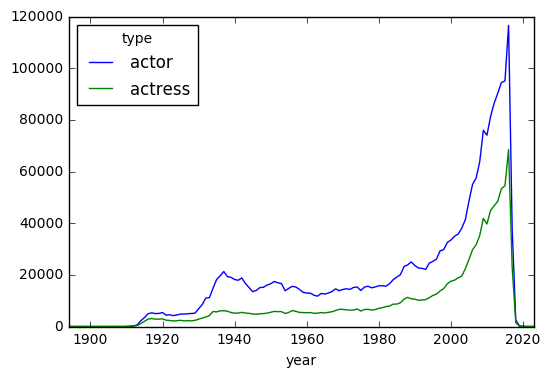

In [18]:
g2 = cast.groupby(['year','type']).size()
df2 = g2.unstack().fillna(0)
df2.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

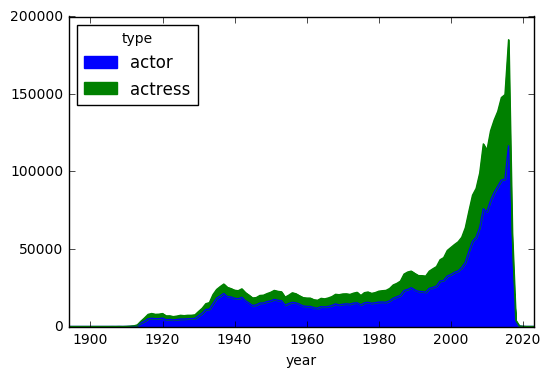

In [19]:
df2.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

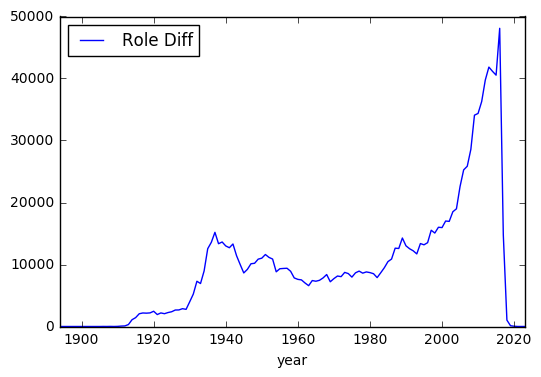

In [27]:
df2['Role Diff'] = df2.actor - df2.actress
df2.plot(y = 'Role Diff')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

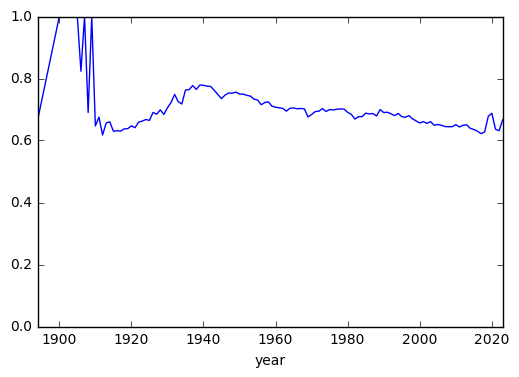

In [31]:
(df2.actor / (df2.actor + df2.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

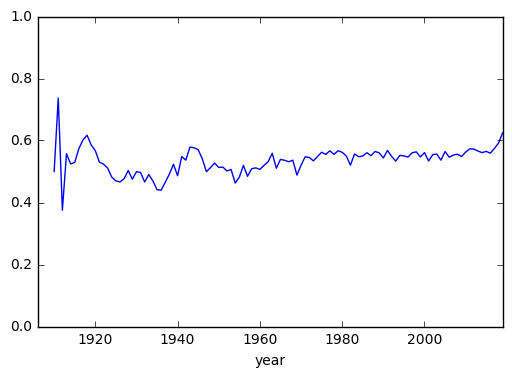

In [34]:
g2 = cast[cast.n==2].groupby(['year','type']).size()
df2 = g2.unstack()
(df2.actor/ (df2.actor + df2.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

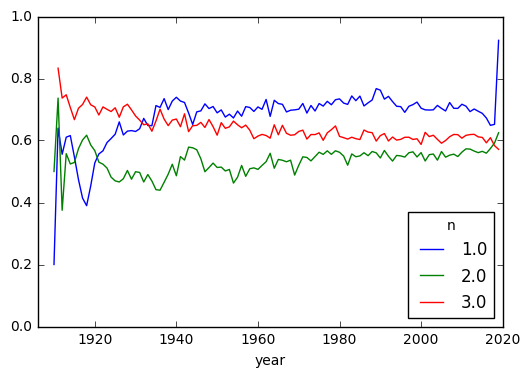

In [38]:
g2 = cast[cast.n<=3].groupby(['year','type','n']).size()
df2 = g2.unstack('type')
(df2.actor/ (df2.actor + df2.actress)).unstack().plot(ylim=[0,1])